# Dataset Explanation
Pada analisa kali ini saya menggunakan dataset bernama **Mall Customers Segmentation** yang didapat dari platfom [kaggle.](https://www.kaggle.com/datasets/abdallahwagih/mall-customers-segmentationa) Dataset ini terdiri atas 5 kolom yakni CustomerID, Genre, Age, Annual Income (k$), dan Spending Score (1-100).

Pengertian Setiap Kolom:
- CustomerID: Berisikan ID dari masing-masing pelanggan
- Genre: Adalah jenis kelamin pelanggan
- Age: Umur dari pelanggan
- Annual Income (k$): Pemasukan tahunan pelanggan
- Spending Score (1-100): Skor yang diberikan oleh mall terhadap pelanggan berdasarkan aktivitas belanjanya

# Business Question
Berdasarkan hasil analisa yang akan didapatkan, kita akan dapat menjawab ketiga pertanyaan berikut:
1. Bagaimana Pengaruh tingkat pendapatan terhadap perilaku belanja pelanggan di tiap segmen?
2.  Apakah terdapat kategori pelanggan yang berpotensi menjadi target kampanye pemasaran?
3. Apakah pelanggan dengan usia muda cenderung memiliki spending score yang lebih tinggi dibandingkan pelanggan dengan usia yang lebih tua?







# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from IPython.display import display


# Dataset Exploration

In [2]:
df = pd.read_csv('/kaggle/input/mall-customers-segmentation/Mall_Customers.csv')
display(df.head())

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Berdasarkan tabel diatas, dapat diketahui bahwa tidak terdapat missing value pada data yang ada.

In [6]:
print("Jumlah Baris:", df.shape[0])
print("Jumlah Kolom:", df.shape[1])

Jumlah Baris: 200
Jumlah Kolom: 5


In [7]:
print(f"Jumlah baris yang terduplikat: {df.duplicated().sum()}")

Jumlah baris yang terduplikat: 0


# Preprocessing

Dikarenakan penamaan kolom pada dataset yang dimiliki masih memiliki simbol dan whitespace, maka nama kolom tersebut harus di rename.

In [8]:
df.columns = ['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore']

In [9]:
display(df.head())

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Nama kolom sudah berubah

In [10]:
df.dtypes

CustomerID        int64
Gender           object
Age               int64
AnnualIncome      int64
SpendingScore     int64
dtype: object

Mengubah data pada kolom gender menjadi sebuah bilangan yakni 0 dan 1

In [11]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Data Distribution

## Gender Distribution

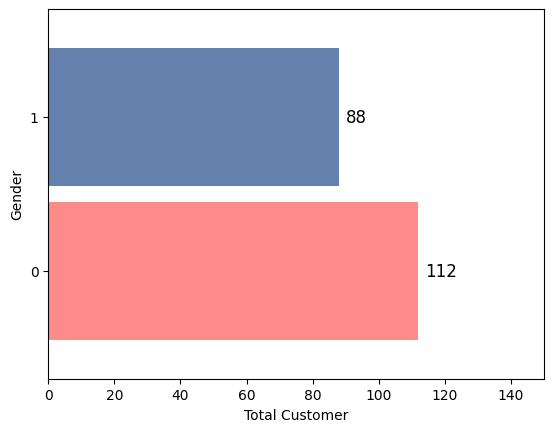

In [12]:
ax = df['Gender'].value_counts().plot(kind='barh', color=['#FF8A8A', '#6482AD'], width=0.9)

for p in ax.patches:
    ax.annotate(f'{p.get_width()}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                fontsize=12, color='black',
                xytext=(5, 0), textcoords='offset points')


plt.ylabel('Gender')
plt.xlabel('Total Customer')
plt.yticks(rotation=0)
plt.xlim(0, 150)
plt.show()

Label pada gender telah di encoding dengan tujuan agar dapat di proses pada saat modeling nanti. Label 1 adalah pria dan label 2 adalah wanita.

## Age Distribution

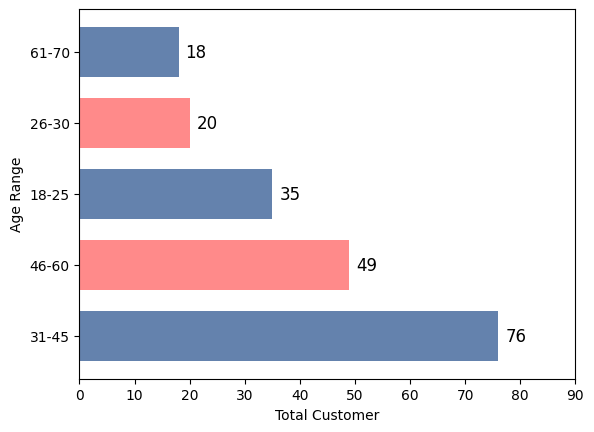

In [13]:
bins = [18, 25, 30, 45, 60, 70]
labels = ['18-25', '26-30', '31-45', '46-60', '61-70']
df['Age Range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

ax = df['Age Range'].value_counts().plot(kind='barh', color=['#6482AD', '#FF8A8A', '#6482AD', '#FF8A8A', '#6482AD', '#FF8A8A'], width=0.7)

for p in ax.patches:
    ax.annotate(f'{p.get_width()}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                fontsize=12, color='black',
                xytext=(5, 0), textcoords='offset points')

plt.xlabel('Total Customer')
plt.ylabel('Age Range')
plt.yticks(rotation=0)
plt.xlim(0, 90)
plt.show()

## Annual Income Distribution

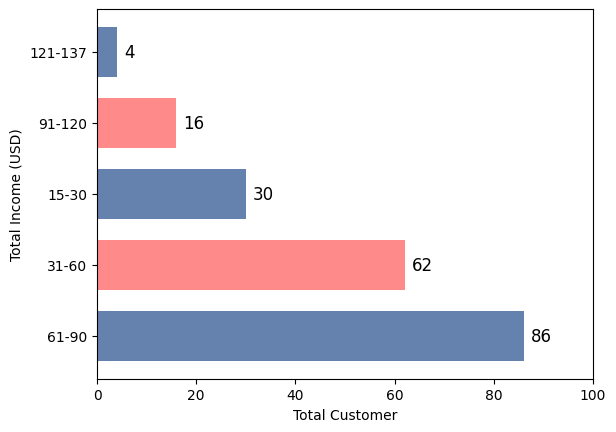

In [14]:
bins = [15, 30, 60, 90, 120, 137]
labels = ['15-30', '31-60', '61-90', '91-120', '121-137']
df['Income Range'] = pd.cut(df['AnnualIncome'], bins=bins, labels=labels, right=False)

ax = df['Income Range'].value_counts().plot(kind='barh', color=['#6482AD', '#FF8A8A', '#6482AD', '#FF8A8A', '#6482AD'], width=0.7)

for p in ax.patches:
    ax.annotate(f'{p.get_width()}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                fontsize=12, color='black',
                xytext=(5, 0), textcoords='offset points')


plt.xlabel('Total Customer')
plt.ylabel('Total Income (USD)')
plt.yticks(rotation=0)
plt.xlim(0, 100)
plt.show()

## Spending Score Distribution

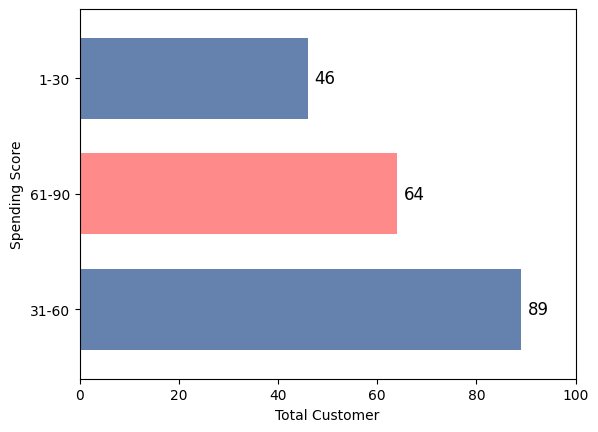

In [15]:
bins = [1, 30, 60, 99]
labels = ['1-30', '31-60', '61-90']
df['Spending Score Distribution'] = pd.cut(df['SpendingScore'], bins=bins, labels=labels, right=False)

ax = df['Spending Score Distribution'].value_counts().plot(kind='barh', color=['#6482AD', '#FF8A8A', '#6482AD'], width=0.7)

for p in ax.patches:
    ax.annotate(f'{p.get_width()}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                fontsize=12, color='black',
                xytext=(5, 0), textcoords='offset points')

plt.xlabel('Total Customer')
plt.ylabel('Spending Score')
plt.yticks(rotation=0)
plt.xlim(0, 100)
plt.show()

# Exploratory Data Analysis

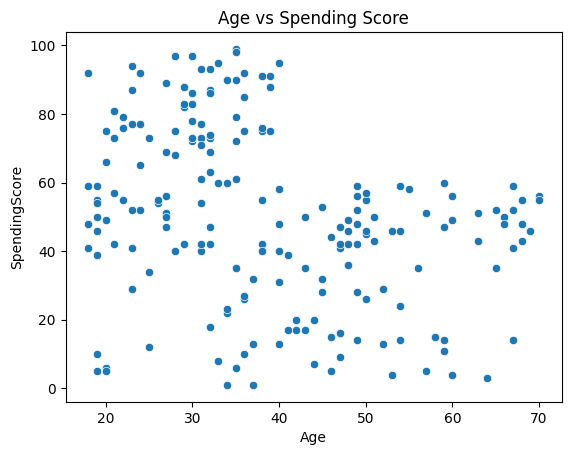

In [16]:
sns.scatterplot(x='Age', y='SpendingScore', data=df)
plt.title('Age vs Spending Score')
plt.show()

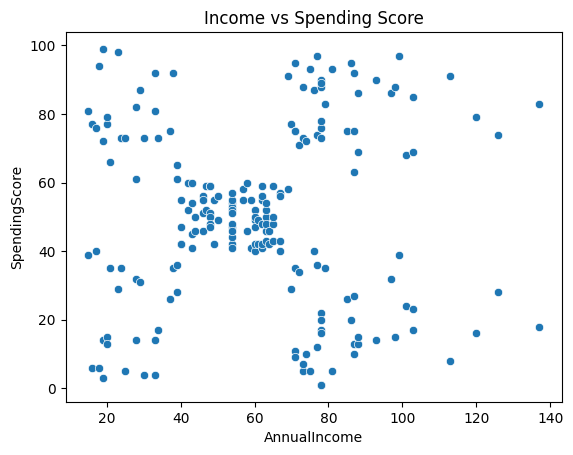

In [17]:
sns.scatterplot(x='AnnualIncome', y='SpendingScore', data=df)
plt.title('Income vs Spending Score')
plt.show()

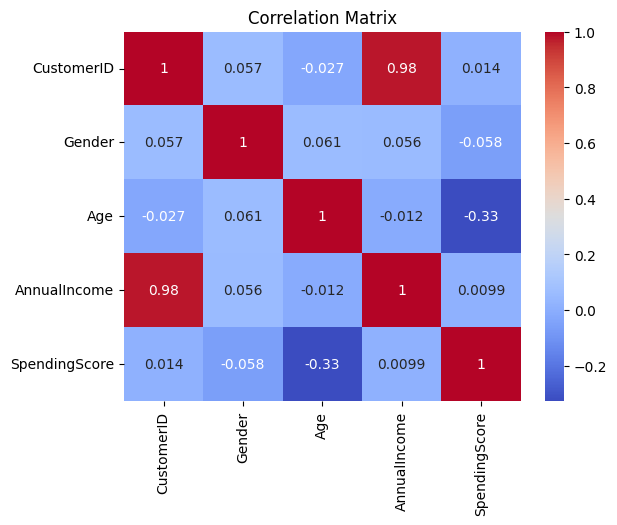

In [18]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Model Selection & Segmentation

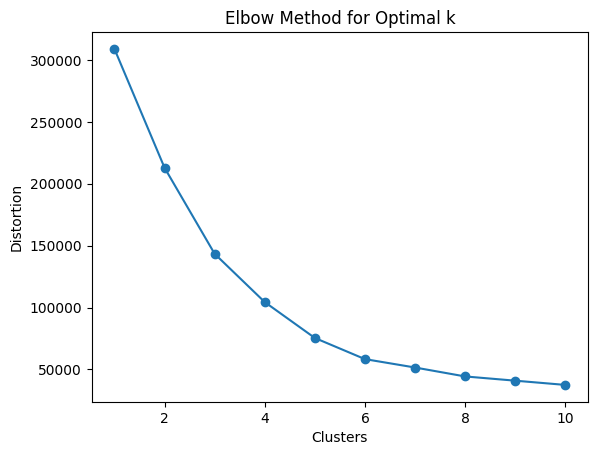

In [19]:
warnings.filterwarnings("ignore")

distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['Age', 'AnnualIncome', 'SpendingScore','Gender']])
    distortions.append(kmeans.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Clusters')
plt.ylabel('Distortion')
plt.show()

In [20]:
warnings.filterwarnings("ignore")

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Age', 'AnnualIncome', 'SpendingScore', 'Gender']])


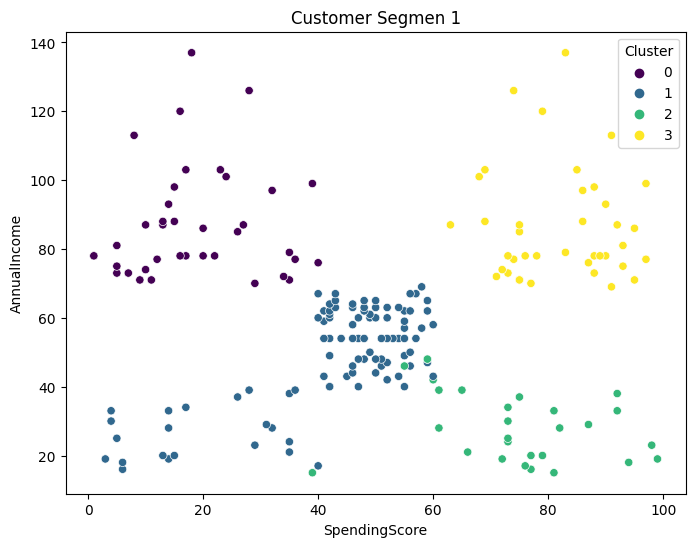

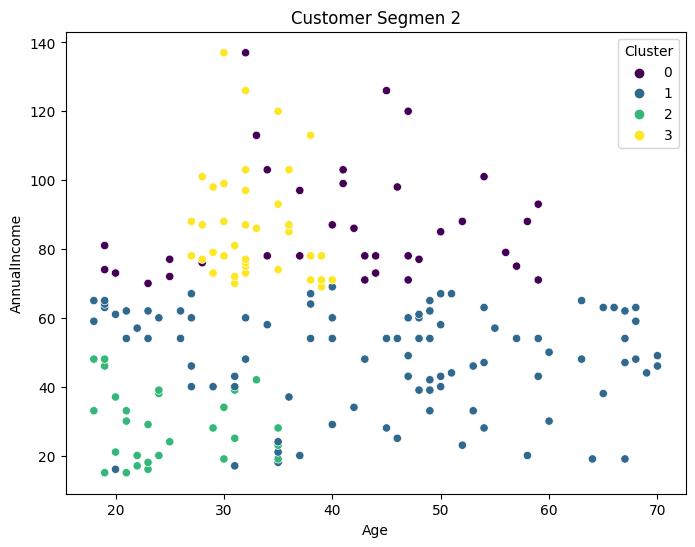

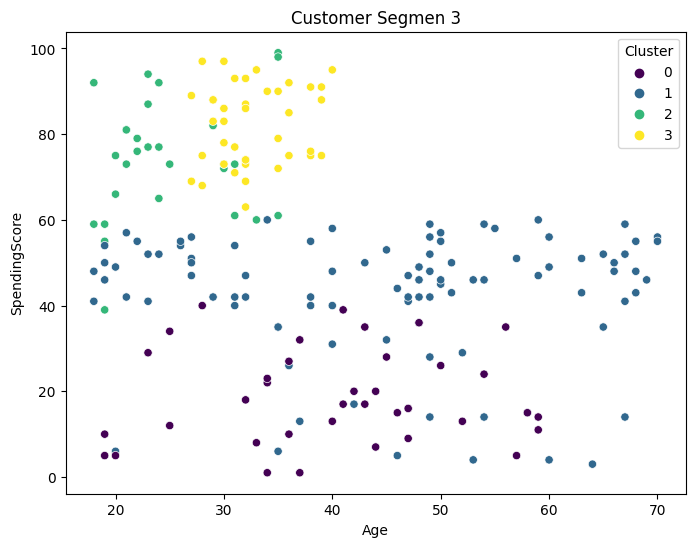

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='SpendingScore', y='AnnualIncome', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segmen 1')

plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='AnnualIncome', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segmen 2')

plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='SpendingScore', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segmen 3')
plt.show()

#  Question Answer

## Bagaimana Pengaruh tingkat pendapatan terhadap perilaku belanja pelanggan di tiap segmen?

Berdasarkan Customer Segmen 1 (Annual Income vs Spending Score), terlihat bahwa pelanggan dapat dikelompokan menjadi beberapa kategori.

- Cluster 0 adalah pelanggan dengan pendapat tinggi, namun mempunyai nilai spending score yang rendah. Kategori ini mampu untuk belanja, namun tidak tertarik untuk belanja dengan nominal yang tinggi di toko.
-Cluster 1 adalah pelanggan dengan pendapatan rendah dengan nilai spending score yang tinggi. Kategori ini adalah kategori yang paling aktif dalam berbelanja di toko.
- Cluster 2 adalah pelanggan dengan pendapatan rendah dengan spending score yang rendah. Kategori ini adalah kategori yang cenderung berhemat dalam berbelanja.
- Cluster 3 adalah pelanggan dengan pendapatan yang tinggi dan nilai dari spending score juga tinggi. Kategori ini adalah kategori yang paling sering berbelanja dan memiliki daya beli yang tinggi.


## Apakah terdapat kategori pelanggan yang berpotensi menjadi target kampanye pemasaran?

Berdasarkan analisis Customer Segment 3 (Spending Score vs Age) terdapat dua kelompok pelanggan potensial sebagai target pemasaran. Kelompok pertama, yaitu cluster 1 menunjukkan pelanggan dengan tingkat spending score yang tinggi dan usia yang relatif muda. Sementara itu, cluster 2 memiliki karakteristik serupa dengan cluster 1, namun dinilai perlu pendekatan promosi yang lebih personal untuk menarik perhatian mereka dikarenakan masih cukup tersebarnya usia pada kategori ini.

## Apakah pelanggan dengan usia muda cenderung memiliki spending score yang lebih tinggi dibandingkan pelanggan dengan usia yang lebih tua?
Berdasarkan analisis Customer Segment 3, pelanggan berusia 20 hingga 40 tahun tercatat memiliki spending score tertinggi. Jika usia di atas 40 tahun dikelompokkan sebagai kategori pelanggan yang lebih tua, maka pernyataan tersebut dapat disimpulkan sebagai benar.

# Kesimpulan
Clustering menggunakan model k-means dapat menjadi salah satu alat yang efektif untuk merancang strategi pemasaran berdasarkan kategori pelanggan yang ada. jika data pelanggan telah terkelompokkan dengan baik, maka dapat diambil beberapa langkah seperti pemahaman segmen pelanggan, pengambilan keputusan yang lebih tepat, dan potensi loyalitas pelanggan.